In [7]:
import cv2
import math
import os
from tensorflow import random_crop
from tensorflow import Session

In [6]:
img=cv2.imread('pics/test.jpg')

In [7]:
img.shape

(1096, 1300, 3)

In [4]:
centre=(math.floor(img.shape[0]/2),math.floor(img.shape[1]/2))

In [5]:
# img_cropped=img[centre[0]-112:centre[0]+112,centre[1]-112:centre[1]+112,:]

In [6]:
# cv2.imshow("cropped",img_cropped)
# cv2.waitKey(0)

In [8]:
resized=cv2.resize(img,(144,96))
# cv2.imshow("resized",resized)
# cv2.waitKey(0)

In [9]:
cv2.imwrite('pics/test_resized.jpg',resized)

True

In [6]:
rootdir='pics_whitebackground'
total=0
for subdir in os.listdir(rootdir):
    if(subdir in ['can']):
        for item in os.walk(rootdir+ "/"+subdir):
            files=item[2]
            for file in files:
                try:
                    img=cv2.imread(rootdir+ "/"+subdir+"/"+file)
                    cropped=random_crop(img[:1000,:1000],[256,256,1])
                    cv2.imwrite(rootdir+ "/"+subdir+'/'+str(total)+'.jpg',Session().run(cropped).reshape(256,256))
                    cropped=random_crop(img[:1000,:1000],[256,256,1])
                    cv2.imwrite(rootdir+ "/"+subdir+'/'+str(total+1)+'.jpg',Session().run(cropped).reshape(256,256))
                    cropped=random_crop(img[:1000,:1000],[256,256,1])
                    cv2.imwrite(rootdir+ "/"+subdir+'/'+str(total+2)+'.jpg',Session().run(cropped).reshape(256,256))
                    cropped=random_crop(img[:1000,:1000],[256,256,1])
                    cv2.imwrite(rootdir+ "/"+subdir+'/'+str(total+3)+'.jpg',Session().run(cropped).reshape(256,256))
                    cropped=random_crop(img[:1000,:1000],[256,256,1])
                    cv2.imwrite(rootdir+ "/"+subdir+'/'+str(total+4)+'.jpg',Session().run(cropped).reshape(256,256))
                    total+=5
                except:
                    continue

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [10]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0,
        height_shift_range=0,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        channel_shift_range=0.4,
        fill_mode='nearest')

In [36]:
img = load_img('pics/takeout containers/31C5-9VddsL._SX342_.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='pics/takeout containers/preview', save_prefix='i', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [47]:
total=0

In [51]:
# resizing files in a particular folder

for item in os.walk('pics_highres/image data/validation/can'):
    files=item[2]
    for file in files:
        try:
            img=cv2.imread('pics_highres/image data/validation/can'+ "/"+file)
            resized=cv2.resize(img,(256,256))
            cv2.imwrite('pics_highres/image data/validation/can/resized/'+str(total)+'.jpg',resized)
            total+=1
        except:
            continue

In [41]:
# resizing a particular file
img=cv2.imread('pics/bottle/resized/bottle.jpg')
resized=cv2.resize(img,(144,96))
cv2.imwrite('pics/bottle/resized/327.jpg',resized)

True

In [13]:
for item in os.walk('pics_whitebackground/can'):
    files=item[2]
    for file in files:
        if(file!='.DS_Store'):
            img = load_img('pics_whitebackground/can/'+file) 
            img=img.resize((256,256))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape) 
            i=0
            for batch in datagen.flow(x, batch_size=1,
                save_to_dir='pics_whitebackground/can_aug/', save_prefix=i, save_format='jpeg'):
                i += 1
                if i > 13:
                    break 

In [67]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

/anaconda3/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:274: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:278: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:282: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]
/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
 

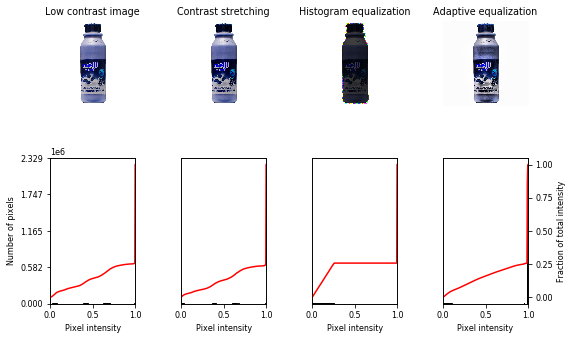

In [68]:
from skimage import data, img_as_float
from skimage import exposure
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Lets try augmenting a cifar10 image using these techniques
from skimage import data, img_as_float
from skimage import exposure

# Load an example image from cifar10 dataset
img = cv2.imread('pics_highres/bottle/resized/87.jpg')

# Set font size for images
matplotlib.rcParams['font.size'] = 8

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Histogram Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

#### Everything below here is just to create the plot/graphs ####

# Display results
fig = plt.figure(figsize=(8, 5)) 
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
    
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()